# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [32]:
# Tampilkan 5 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [33]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [34]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

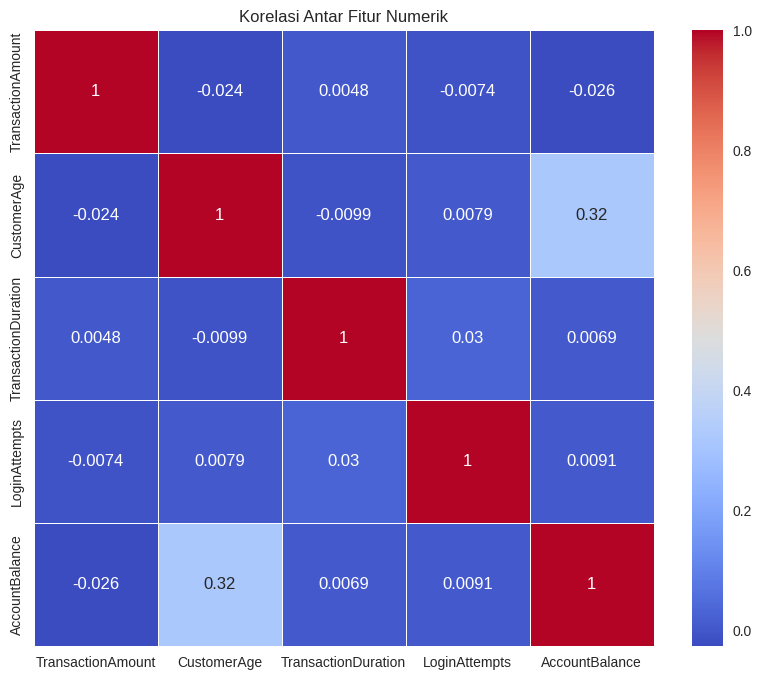

In [35]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

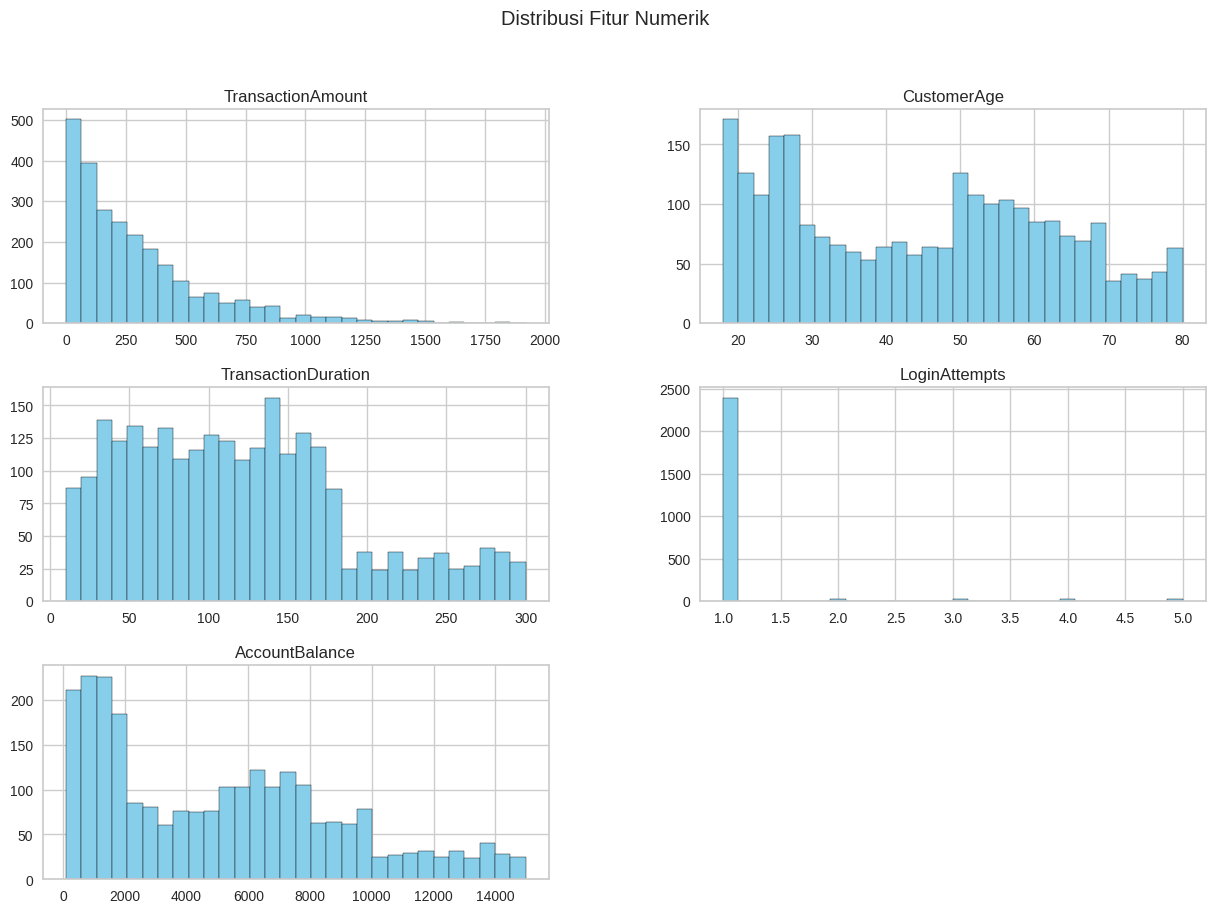

In [36]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']].hist(
    figsize=(15,10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik')
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

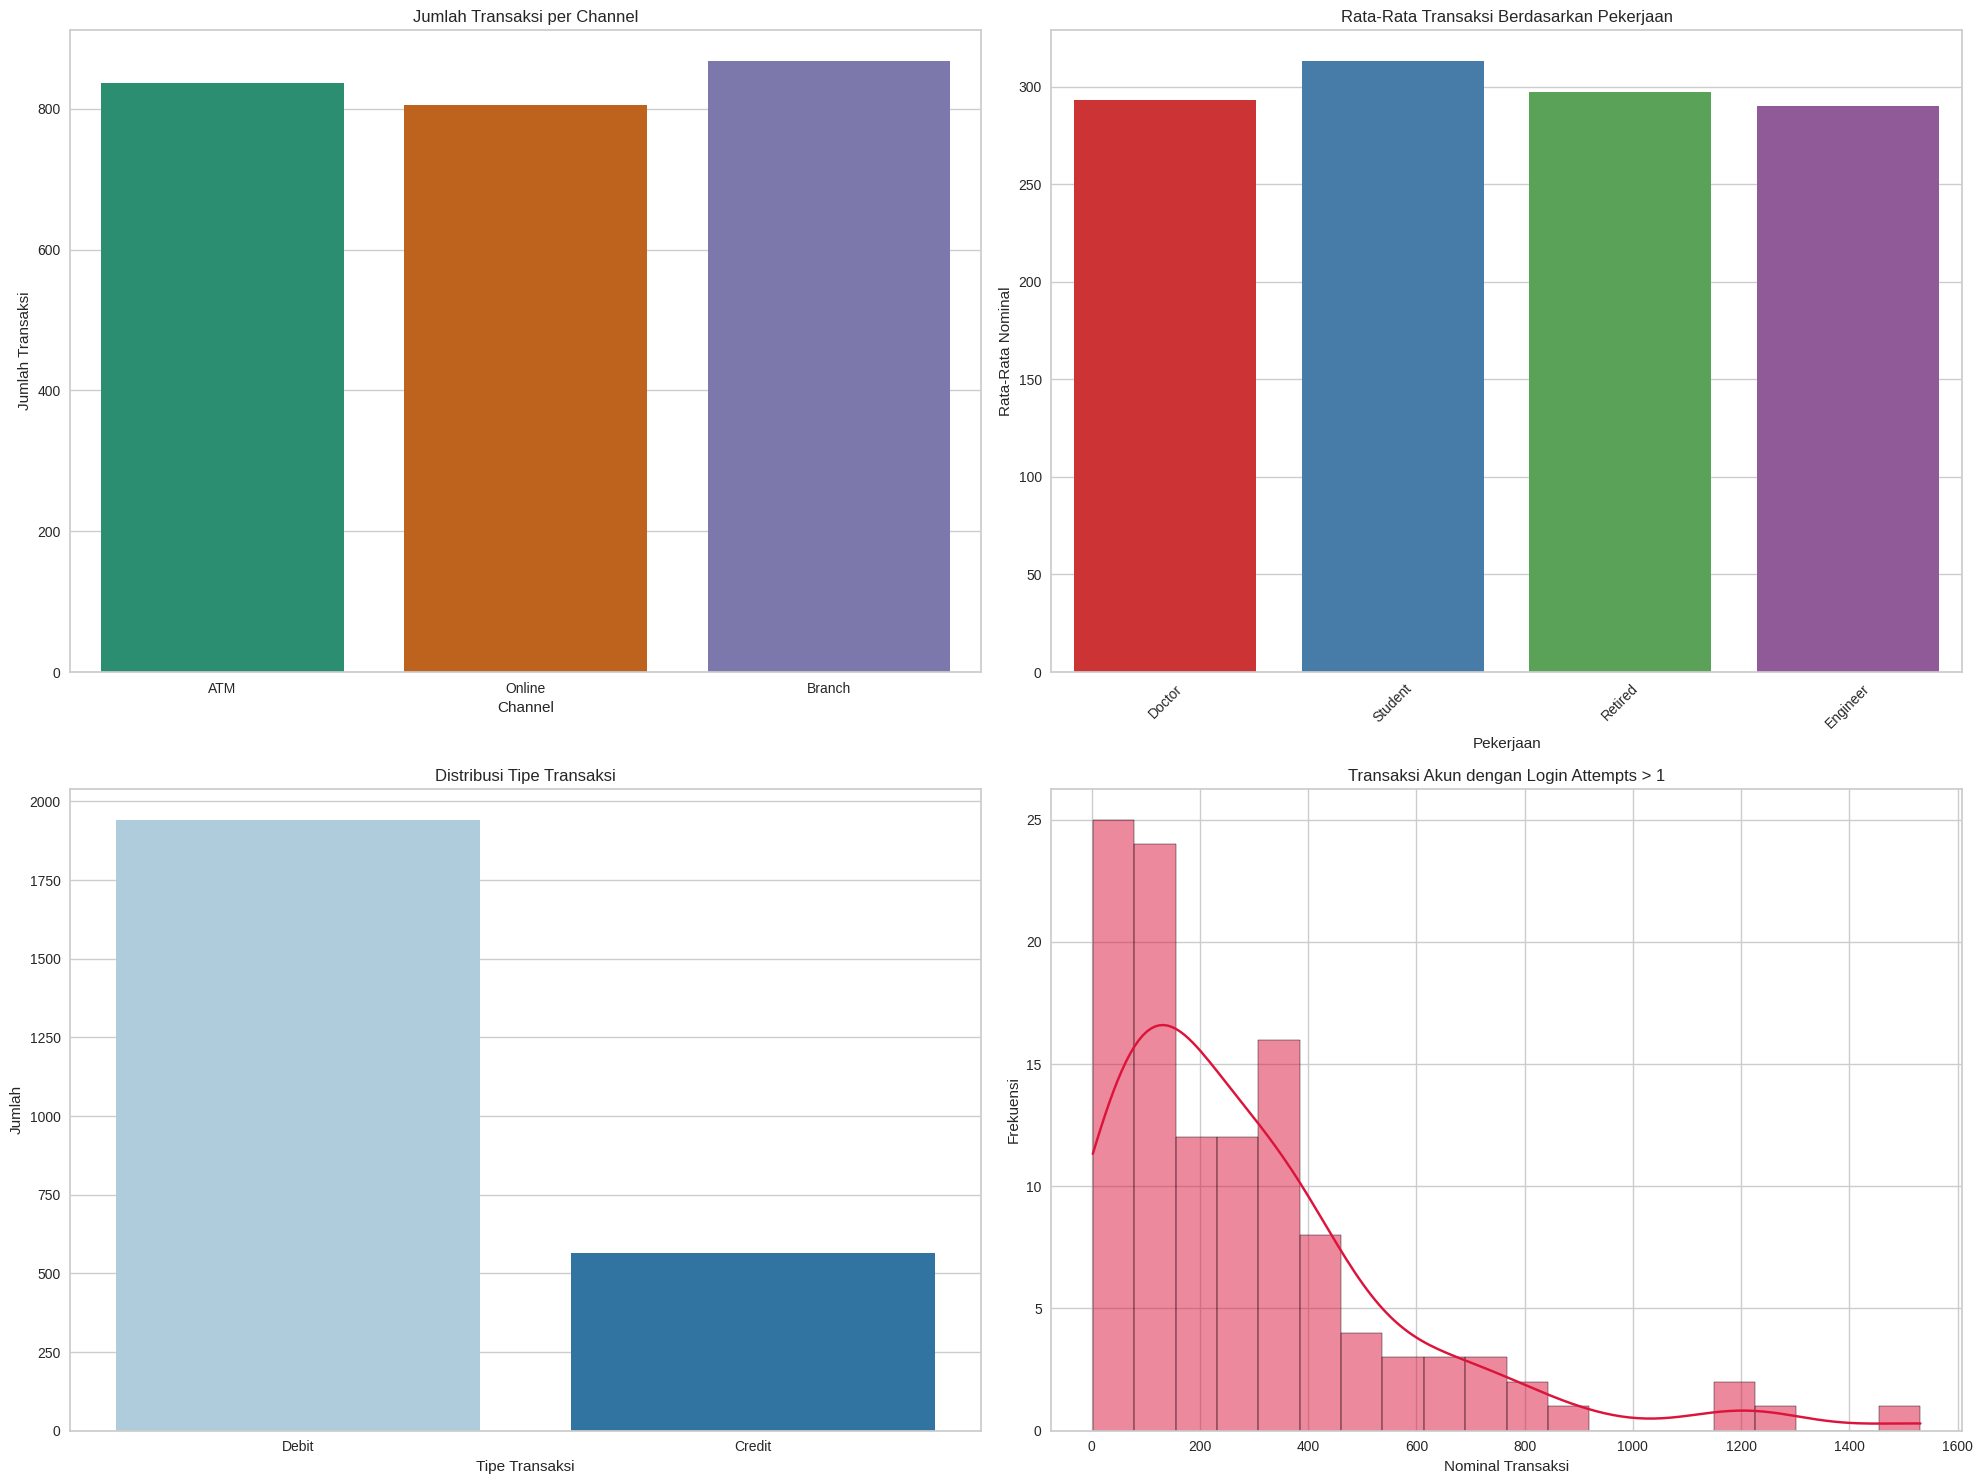

In [37]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
plt.figure(figsize=(20, 15))

# 6.1 Jumlah Transaksi per Channel
plt.subplot(2, 2, 1)
sns.countplot(x='Channel', data=df, hue='Channel', legend=False, palette='Dark2')
plt.title('Jumlah Transaksi per Channel')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Channel')

# 6.2 Rata-rata Nominal Transaksi Berdasarkan Pekerjaan
plt.subplot(2, 2, 2)
sns.barplot(x='CustomerOccupation', y='TransactionAmount', data=df, estimator='mean', errorbar=None, palette='Set1', hue='CustomerOccupation', legend=False)
plt.title('Rata-Rata Transaksi Berdasarkan Pekerjaan')
plt.xticks(rotation=45)
plt.ylabel('Rata-Rata Nominal')
plt.xlabel('Pekerjaan')

# 6.3 Distribusi Transaksi Kredit vs Debit
plt.subplot(2, 2, 3)
sns.countplot(x='TransactionType', data=df, hue='TransactionType', legend=False, palette='Paired')
plt.title('Distribusi Tipe Transaksi')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Jumlah')

# 6.4 Distribusi Transaksi pada Akun dengan Login Attempts > 1
plt.subplot(2, 2, 4)
high_login = df[df['LoginAttempts'] > 1]
sns.histplot(high_login['TransactionAmount'], bins=20, color='crimson', kde=True)
plt.title('Transaksi Akun dengan Login Attempts > 1')
plt.xlabel('Nominal Transaksi')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [38]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [39]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [40]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df[numeric_features].head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,NaN,0.648276,0.0,0.492591


In [41]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'], inplace=True)

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [42]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.

#Membuat pertimbangan menggunakan get_dummies() atau LabelEncoder()
# Menampilkan jumlah kategori unik untuk 'Location'
num_unique_locations = df['Location'].nunique()
print(f"Jumlah kategori unik untuk 'Location': {num_unique_locations}")

# Menampilkan daftar kategori unik untuk 'Location'
unique_locations = df['Location'].unique()
print(f"Daftar kategori unik untuk 'Location': {unique_locations}\n")

# Menampilkan jumlah kategori unik untuk 'CustomerOccupation'
num_unique_occupations = df['CustomerOccupation'].nunique()
print(f"Jumlah kategori unik untuk 'CustomerOccupation': {num_unique_occupations}")

# Menampilkan daftar kategori unik untuk 'Location'
unique_occupations = df['CustomerOccupation'].unique()
print(f"Daftar kategori unik untuk 'CustomerOccupation': {unique_occupations}\n")

#Meng-encode kate
# Daftar kolom kategorikal yang akan di-encode menggunakan pd.get_dummies()
columns_to_encode_with_dummies = [
    'TransactionType',
    'Location',
    'Channel',
    'CustomerOccupation'
]

# Pastikan kolom-kolom ini ada sebelum di-encode
# Mengubah tipe data ke 'category' untuk efisiensi
for col in columns_to_encode_with_dummies:
    if col in df.columns:
        df[col] = df[col].astype('category')
    else:
        print(f"Peringatan: Kolom '{col}' tidak ditemukan dan akan dilewati untuk encoding.")

# Terapkan One-Hot Encoding pada kolom yang dipilih
# drop_first=True untuk menghindari multikolinearitas (jika tidak ada alasan khusus untuk tidak menggunakannya)
df = pd.get_dummies(df, columns=columns_to_encode_with_dummies, drop_first=True)

Jumlah kategori unik untuk 'Location': 43
Daftar kategori unik untuk 'Location': ['San Diego' 'Houston' 'Mesa' 'Raleigh' 'Atlanta' 'Oklahoma City'
 'Seattle' 'Indianapolis' 'Detroit' 'Nashville' 'Albuquerque' 'Memphis'
 'Louisville' 'Denver' 'Austin' 'Columbus' 'Los Angeles' 'Las Vegas'
 'Fort Worth' 'Miami' 'Milwaukee' 'Baltimore' 'New York' 'San Francisco'
 'San Jose' 'San Antonio' 'Philadelphia' 'Charlotte' 'Tucson' 'Chicago'
 'Sacramento' 'Kansas City' 'Omaha' 'Virginia Beach' 'Dallas' 'Boston'
 'Jacksonville' nan 'Phoenix' 'Washington' 'El Paso' 'Colorado Springs'
 'Fresno' 'Portland']

Jumlah kategori unik untuk 'CustomerOccupation': 4
Daftar kategori unik untuk 'CustomerOccupation': ['Doctor' 'Student' 'Retired' 'Engineer' nan]



(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [43]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Pertimbangan menggunakan antara dropna() atau fillna()
total_rows = len(df)

# Baris yang mengandung data kosong
rows_with_null = df[df.isnull().any(axis=1)]

# Baris yang duplikat
rows_duplicated = df[df.duplicated()]

# Baris yang duplikat dan juga memiliki nilai kosong
rows_null_and_duplicated = pd.merge(rows_with_null, rows_duplicated)

# Hitung jumlahnya
jumlah_kosong = len(rows_with_null)
jumlah_duplikat = len(rows_duplicated)
jumlah_keduanya = len(rows_null_and_duplicated)

# Hitung jumlah yang akan dihapus
jumlah_akan_dihapus = jumlah_kosong + jumlah_duplikat - jumlah_keduanya

# Hitung jumlah data bersih
clean_data = total_rows - jumlah_akan_dihapus

# Persentase data yang dibersihkan
persentase_dihapus = jumlah_akan_dihapus / total_rows * 100
persentase_clean = clean_data / total_rows * 100

# Tampilkan hasil
print(f"Total data awal: {total_rows}")
print(f"Baris dengan missing: {jumlah_kosong}")
print(f"Baris duplikat: {jumlah_duplikat}")
print(f"Baris keduanya (overlap): {jumlah_keduanya}")
print(f"Total yang akan dihapus: {jumlah_akan_dihapus} baris ({persentase_dihapus:.2f}%)")
print(f"Total data bersih: {clean_data} baris ({persentase_clean:.2f}%)")


# Menghapus baris yang memiliki data kosong
df.dropna(inplace=True)
print(f"Jumlah data setelah pembersihan: {len(df)} baris")
df.head()

Total data awal: 2537
Baris dengan missing: 167
Baris duplikat: 22
Baris keduanya (overlap): 0
Total yang akan dihapus: 189 baris (7.45%)
Total data bersih: 2348 baris (92.55%)
Jumlah data setelah pembersihan: 2370 baris


,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType_Debit,Location_Atlanta,Location_Austin,...,Location_San Jose,Location_Seattle,Location_Tucson,Location_Virginia Beach,Location_Washington,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,0.007207,2023-04-11 16:29:14,0.838710,0.244828,0.0,0.336832,2024-11-04 08:08:08,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.195940,2023-06-27 16:44:19,0.806452,0.451724,0.0,0.918055,2024-11-04 08:09:35,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.065680,2023-07-10 18:16:08,0.016129,0.158621,0.0,0.068637,2024-11-04 08:07:04,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0.096016,2023-05-05 16:32:11,0.129032,0.051724,0.0,0.569198,2024-11-04 08:09:06,True,False,False,...,False,False,False,False,False,False,True,False,False,True
5,0.047888,2023-04-03 17:15:01,0.000000,0.558621,0.0,0.045738,2024-11-04 08:06:36,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [44]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [45]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Menentukan batas outlier dengan metode IQR
Q1 = df['TransactionAmount'].quantile(0.25)
print(f"Q1: {Q1:.3f}")
Q3 = df['TransactionAmount'].quantile(0.75)
print(f"Q3: {Q3:.3f}")
IQR = Q3 - Q1
print(f"IQR: {IQR:.3f}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Batas bawah adalah {lower_bound:.3f} dan batas atas adalah {upper_bound:.3f}")

# Deteksi jumlah outlier
outliers = df[(df['TransactionAmount'] < lower_bound) | (df['TransactionAmount'] > upper_bound)]
print(f"Jumlah outlier: {outliers.shape[0]}")

# Lakukan Capping/Clipping pada kolom 'TransactionAmount'
df['TransactionAmount'] = df['TransactionAmount'].clip(lower=lower_bound, upper=upper_bound)

print("\n--- TransactionAmount Setelah Capping (df.describe()) ---")
print(df[['TransactionAmount']].describe())

Q1: 0.042
Q3: 0.214
IQR: 0.172
Batas bawah adalah -0.216 dan batas atas adalah 0.472
Jumlah outlier: 104

--- TransactionAmount Setelah Capping (df.describe()) ---
       TransactionAmount
count        2348.000000
mean            0.147503
std             0.130508
min             0.000000
25%             0.042249
50%             0.109899
75%             0.214105
max             0.471888


In [46]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.
# Method used: pd.qcut for 'TransactionAmount_Bin' and pd.cut for 'LoginAttempts_Bin', followed by pd.get_dummies for encoding the new binned columns.
# Reason for use: Binning can simplify complex numerical data, reduce the impact of small fluctuations, and potentially improve model performance by creating more interpretable categories. For 'TransactionAmount', quantile-based binning creates categories with roughly equal numbers of observations. For 'LoginAttempts', given its limited unique values after scaling (often resulting in 0.0, 0.25, 0.5, 0.75, 1.0), `pd.qcut` might struggle due to duplicate bin edges. Therefore, `pd.cut` with manual bins based on quantiles is a more robust approach.
# Result obtained: Two new binned categorical columns ('TransactionAmount_Bin', 'LoginAttempts_Bin') are created and then One-Hot Encoded, adding more features to the dataset.
print("\n--- Binning dan Encoding Fitur Numerik ---")

# Definisi label untuk TransactionAmount
transaction_amount_labels = ['Very_Small', 'Small', 'Medium', 'Large', 'Very_Large']
# Menggunakan pd.qcut untuk quantile binning, yang akan membuat 5 bins dengan frekuensi yang kurang lebih sama
df['TransactionAmount_Bin'] = pd.qcut(
    df['TransactionAmount'],
    q=5, # Membuat 5 bins/kategori
    labels=transaction_amount_labels,
    duplicates='drop' # Menangani jika ada nilai duplikat yang membuat bin kosong
)
print("--- TransactionAmount Binning ---")
print(df[['TransactionAmount', 'TransactionAmount_Bin']].head())
print("\nDistribusi kategori TransactionAmount_Bin:")
print(df['TransactionAmount_Bin'].value_counts())
print("-" * 30)

# Definisi label untuk LoginAttempts
login_attempts_labels = ['Normal_Attempts', 'Few_Attempts', 'Many_Attempts']
try:
    df['LoginAttempts_Bin'] = pd.qcut(
        df['LoginAttempts'],
        q=3, # Membuat 3 bins/kategori
        labels=login_attempts_labels,
        duplicates='drop' # Menangani jika ada nilai duplikat yang membuat bin kosong
    )
except ValueError as e:
    print(f"Error saat qcut LoginAttempts: {e}. Mungkin terlalu sedikit nilai unik setelah scaling.")
    print("Mencoba menggunakan pd.cut dengan batas manual yang umum untuk LoginAttempts:")
    # Create unique bins based on quantiles to avoid ValueError
    bins_la = df['LoginAttempts'].quantile([0, 0.33, 0.66, 1]).tolist()
    bins_la[0] = bins_la[0] - 0.001 # Adjust min bound slightly
    bins_la[-1] = bins_la[-1] + 0.001 # Adjust max bound slightly
    bins_la = sorted(list(set(bins_la))) # Ensure unique and sorted
    if len(bins_la) < 2: # Handle cases where all values are the same
        bins_la = [df['LoginAttempts'].min() - 0.001, df['LoginAttempts'].max() + 0.001]
        login_attempts_labels = ['Single_Category'] # Adjust labels if only one bin
    elif len(bins_la) - 1 != len(login_attempts_labels): # Adjust labels if bin count doesn't match
        login_attempts_labels = [f'Attempt_{i}' for i in range(len(bins_la) - 1)]

    df['LoginAttempts_Bin'] = pd.cut(df['LoginAttempts'], bins=bins_la, labels=login_attempts_labels, include_lowest=True, right=True)

print("\n--- LoginAttempts Binning ---")
print(df[['LoginAttempts', 'LoginAttempts_Bin']].head())
print("\nDistribusi kategori LoginAttempts_Bin:")
print(df['LoginAttempts_Bin'].value_counts())
print("-" * 30)

# Encode the new binned categorical columns
df = pd.get_dummies(df, columns=['TransactionAmount_Bin', 'LoginAttempts_Bin'], drop_first=True)
print("\n--- Head DataFrame Setelah Binning dan Encoding ---")
print(df.head())
print(f"Jumlah kolom setelah binning dan encoding: {df.shape[1]}")



--- Binning dan Encoding Fitur Numerik ---
--- TransactionAmount Binning ---
   TransactionAmount TransactionAmount_Bin
0           0.007207            Very_Small
1           0.195940                 Large
2           0.065680                 Small
3           0.096016                Medium
5           0.047888                 Small

Distribusi kategori TransactionAmount_Bin:
TransactionAmount_Bin
Very_Small    470
Medium        470
Very_Large    470
Small         469
Large         469
Name: count, dtype: int64
------------------------------
Error saat qcut LoginAttempts: Bin labels must be one fewer than the number of bin edges. Mungkin terlalu sedikit nilai unik setelah scaling.
Mencoba menggunakan pd.cut dengan batas manual yang umum untuk LoginAttempts:

--- LoginAttempts Binning ---
   LoginAttempts LoginAttempts_Bin
0            0.0         Attempt_0
1            0.0         Attempt_0
2            0.0         Attempt_0
3            0.0         Attempt_0
5            0.0         

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [47]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
print(df.describe())

       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2348.000000  2348.000000          2348.000000    2348.000000   
mean            0.147503     0.430476             0.378091       0.030239   
std             0.130508     0.287711             0.243118       0.147198   
min             0.000000     0.000000             0.000000       0.000000   
25%             0.042249     0.145161             0.182759       0.000000   
50%             0.109899     0.435484             0.351724       0.000000   
75%             0.214105     0.661290             0.524138       0.000000   
max             0.471888     1.000000             1.000000       1.000000   

       AccountBalance  
count     2348.000000  
mean         0.336489  
std          0.262597  
min          0.000000  
25%          0.093553  
50%          0.309532  
75%          0.510548  
max          1.000000  


TransactionAmount              float64
CustomerAge                    float64
TransactionDuration            float64
LoginAttempts                  float64
AccountBalance                 float64
                                ...   
LoginAttempts_Bin_Attempt_1       bool
Hour                             int32
DayOfWeek                        int32
IsWeekend                        int64
TransactionHour                  int32
Length: 62, dtype: object


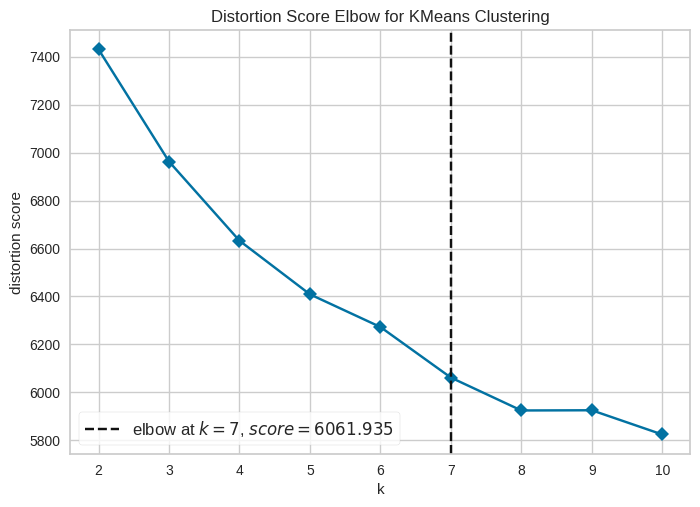

In [48]:
# Contoh preprocessing lengkap sebelum clustering
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])
df['Hour'] = df['PreviousTransactionDate'].dt.hour
df['DayOfWeek'] = df['PreviousTransactionDate'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df = df.drop(columns=['PreviousTransactionDate'])

# Jika masih ada kolom tanggal lain, lakukan hal sama atau drop
if 'TransactionDate' in df.columns:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
    df['TransactionHour'] = df['TransactionDate'].dt.hour
    df = df.drop(columns=['TransactionDate'])

# Pastikan semua kolom bertipe numerik
print(df.dtypes)

model = KMeans(random_state=42, n_init='auto')
visualizer = KElbowVisualizer(model, k=(2, 11), timings=False)
visualizer.fit(df)
visualizer.show()
plt.show()


In [49]:
# Menggunakan algoritma K-Means Clustering

k_optimal = 7  # Sesuai hasil visualizer terbaru

# Inisialisasi dan fit model KMeans
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init='auto')
kmeans.fit(df)

# Tambahkan hasil cluster ke DataFrame
df['Cluster'] = kmeans.labels_

# Analisis cepat isi tiap cluster
print(df['Cluster'].value_counts())
print(df.groupby('Cluster').mean(numeric_only=True))

Cluster
1    474
3    457
4    322
2    305
5    286
0    256
6    248
Name: count, dtype: int64
         TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
Cluster                                                                       
0                 0.133511     0.541268             0.370717       0.032227   
1                 0.133994     0.428474             0.383319       0.037975   
2                 0.151284     0.443892             0.373940       0.031148   
3                 0.146177     0.761100             0.380352       0.027899   
4                 0.160549     0.081998             0.381420       0.019410   
5                 0.151076     0.080250             0.378068       0.029720   
6                 0.164498     0.550533             0.372358       0.031250   

         AccountBalance  TransactionType_Debit  Location_Atlanta  \
Cluster                                                            
0              0.400224               0.769531         

Jalankan cell code ini untuk menyimpan model kamu.

In [50]:
# Menyimpan model menggunakan joblib

joblib.dump(model, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [51]:
# Menghitung dan menampilkan nilai Silhouette Score.

score = silhouette_score(df.drop(columns='Cluster'), df['Cluster'])
print(f"Silhouette Score untuk k = {k_optimal}: {score:.4f}")

Silhouette Score untuk k = 7: 0.0874


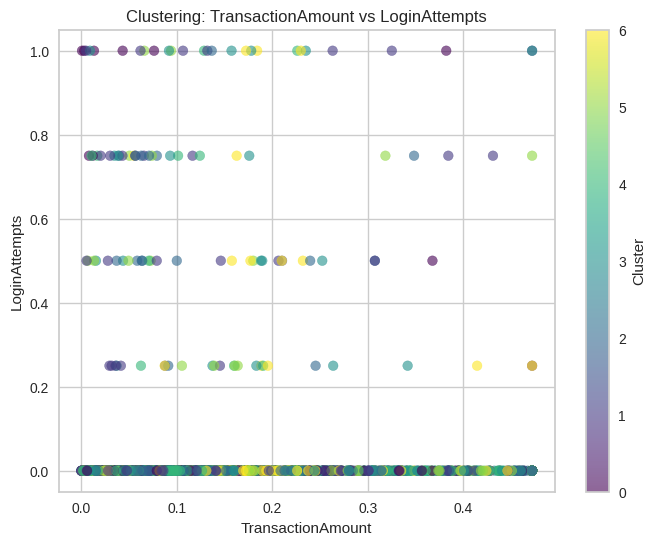

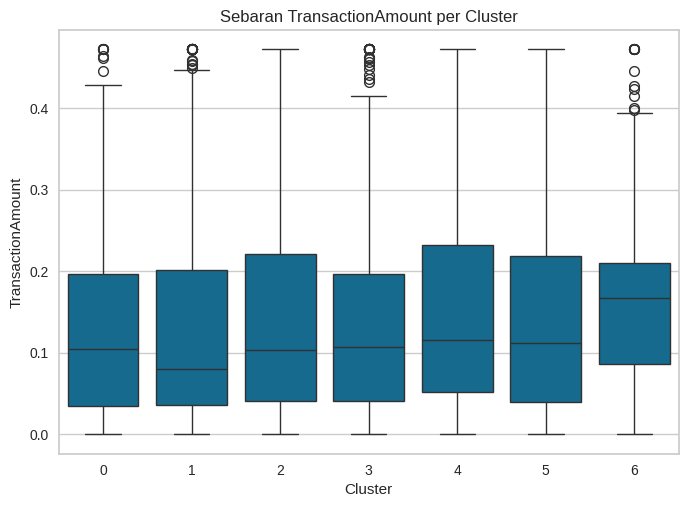

In [52]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df['TransactionAmount'], df['LoginAttempts'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('TransactionAmount')
plt.ylabel('LoginAttempts')
plt.title('Clustering: TransactionAmount vs LoginAttempts')
plt.colorbar(label='Cluster')
plt.show()

sns.boxplot(data=df, x='Cluster', y='TransactionAmount')
plt.title("Sebaran TransactionAmount per Cluster")
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

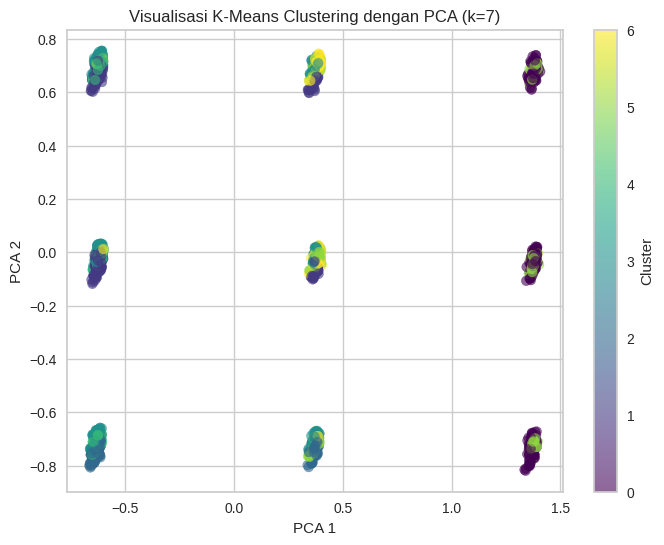

In [53]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(df.drop(columns='Cluster'))

# Plot hasil clustering dalam 2D
plt.figure(figsize=(8,6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Visualisasi K-Means Clustering dengan PCA (k=7)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [54]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [55]:
# Pisahkan fitur numerik dan kategorikal (jika ada)
numerical_features = df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Tampilkan statistik deskriptif numerik per cluster
print("\n--- Statistik Deskriptif Numerik per Cluster ---")
summary_stats = df.groupby('Cluster')[numerical_features].agg(['mean', 'min', 'max'])
print(summary_stats)

# Tampilkan modus untuk fitur kategorikal (jika ada)
if categorical_features:
    print("\n--- Modus Fitur Kategorikal per Cluster ---")
    for col in categorical_features:
        mode_per_cluster = df.groupby('Cluster')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        print(f"\n{col}:\n{mode_per_cluster}")


--- Statistik Deskriptif Numerik per Cluster ---
        TransactionAmount                     CustomerAge                      \
                     mean       min       max        mean       min       max   
Cluster                                                                         
0                0.133511  0.000839  0.471888    0.541268  0.064516  1.000000   
1                0.133994  0.000031  0.471888    0.428474  0.064516  0.983871   
2                0.151284  0.001167  0.471888    0.443892  0.000000  0.935484   
3                0.146177  0.000495  0.471888    0.761100  0.532258  1.000000   
4                0.160549  0.000000  0.471888    0.081998  0.000000  0.161290   
5                0.151076  0.000313  0.471888    0.080250  0.000000  0.161290   
6                0.164498  0.000896  0.471888    0.550533  0.096774  1.000000   

        TransactionDuration                     LoginAttempts  ... DayOfWeek  \
                       mean       min       max          me

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
### **Cluster 0**

* **TransactionAmount**: Rata-rata rendah (0.13), dengan rentang minimum hingga maksimum yang cukup besar (0.0008 - 0.47).
* **CustomerAge**: Usia relatif menengah ke atas (mean 0.54), rentang luas hingga maksimum (0.06 - 1.0).
* **TransactionDuration**: Sedang (mean 0.37).
* **LoginAttempts**: Cenderung rendah (mean 0.03).
* **TransactionHour**: Pukul 18 (fix).
* **IsWeekend**: Seluruh transaksi bukan di akhir pekan (0).
* **Modus TransactionType**: Debit.
* **Modus Lokasi**: Tidak ada lokasi dominan.

**Interpretasi**: Cluster ini menunjukkan pengguna dewasa dengan aktivitas transaksi sore hari, menggunakan debit, dan tidak spesifik ke lokasi tertentu. Aktivitas login tidak intens.

---

### **Cluster 1**

* **TransactionAmount**: Hampir sama dengan Cluster 0 (mean 0.13).
* **CustomerAge**: Lebih muda dari Cluster 0 (mean 0.42).
* **TransactionDuration**: Sedikit lebih lama dari Cluster 0.
* **LoginAttempts**: Lebih tinggi dari Cluster 0 (mean 0.038).
* **TransactionHour**: Pukul 16–17.
* **IsWeekend**: Tidak.
* **Modus TransactionType**: Debit.
* **Modus Lokasi**: Tidak ada.

**Interpretasi**: Kelompok pengguna muda yang bertransaksi di sore hari dan melakukan lebih banyak upaya login. Aktivitas cenderung aktif secara digital.

---

### **Cluster 2**

* **TransactionAmount**: Sedikit lebih tinggi (mean 0.15).
* **CustomerAge**: Usia menengah (mean 0.44), dengan nilai minimum usia 0 (mungkin outlier).
* **TransactionDuration**: Mirip cluster lain.
* **LoginAttempts**: Sedikit rendah.
* **TransactionHour**: Pukul 16–17.
* **IsWeekend**: Tidak.
* **Modus TransactionType**: Debit.
* **Modus Lokasi**: Tidak ada.

**Interpretasi**: Transaksi dari pengguna dengan usia menengah dan nilai transaksi sedikit lebih tinggi. Aktivitas reguler di hari kerja.

---

### **Cluster 3**

* **TransactionAmount**: Menengah (0.146).
* **CustomerAge**: Tertua (mean 0.76), dengan batas bawah cukup tinggi.
* **TransactionDuration**: Lebih lama dari cluster lain.
* **LoginAttempts**: Paling sedikit (0.027).
* **TransactionHour**: Pukul 16–17.
* **IsWeekend**: Tidak.
* **Modus TransactionType**: Debit.
* **Modus Lokasi**: Tidak ada.

**Interpretasi**: Kelompok pengguna senior dengan pola transaksi reguler di sore hari, sangat sedikit aktivitas login. Mungkin pengguna tetap/loyal.

---

### **Cluster 4**

* **TransactionAmount**: Cenderung tinggi (mean 0.160).
* **CustomerAge**: Sangat muda (mean 0.08), sempit di bawah 0.16.
* **TransactionDuration**: Mirip cluster lain.
* **LoginAttempts**: Rendah.
* **TransactionHour**: Pukul 16 (fix).
* **IsWeekend**: Tidak.
* **Modus TransactionType**: Debit.
* **Modus Lokasi**: Tidak ada.

**Interpretasi**: Kelompok sangat muda yang bertransaksi sore hari, nilai transaksi tinggi meski aktivitas login rendah. Bisa jadi pengguna baru atau eksperimental.

---

### **Cluster 5**

* **TransactionAmount**: Hampir sama dengan Cluster 4 (0.151).
* **CustomerAge**: Sangat muda (mean 0.08), sama seperti Cluster 4.
* **TransactionDuration**: Rata-rata mirip.
* **LoginAttempts**: Lebih tinggi dari Cluster 4.
* **TransactionHour**: Pukul 17–18.
* **IsWeekend**: Tidak.
* **Modus TransactionType**: Debit.
* **Modus Lokasi**: Tidak ada.

**Interpretasi**: Mirip Cluster 4 tapi sedikit lebih aktif dalam login dan lebih malam dalam bertransaksi. Mungkin pengguna remaja atau pelajar yang baru mengakses sistem.

---

### **Cluster 6**

* **TransactionAmount**: Tertinggi (mean 0.164).
* **CustomerAge**: Menengah ke atas (mean 0.55), rentang luas.
* **TransactionDuration**: Sedikit lebih pendek dari rata-rata.
* **LoginAttempts**: Stabil (0.031).
* **TransactionHour**: Pukul 16–17.
* **IsWeekend**: Tidak.
* **Modus TransactionType**: Debit.
* **Modus Lokasi**: Tidak ada.

**Interpretasi**: Cluster ini berisi pengguna dengan usia variatif dan aktivitas transaksi bernilai besar. Mereka cukup aktif dan bertransaksi di jam kerja.

---

## **Kesimpulan Umum**:

* Semua cluster didominasi oleh transaksi **bukan akhir pekan** dan **berjenis debit**.
* **Transaksi terjadi antara pukul 16–18**, menunjukkan waktu puncak aktivitas.
* Lokasi **tidak menjadi faktor dominan**, karena semua lokasi bernilai `False`.
* **Perbedaan utama antar cluster** terlihat dari kombinasi usia, jumlah login, dan waktu transaksi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [56]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df['Target'] = df['Cluster']

In [57]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [58]:
# inverse dataset ke rentang normal

# Inverse transform hanya kolom numerik
df[numeric_features] = scaler.inverse_transform(df[numeric_features])

# Tampilkan hasil inverse per cluster
for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\n--- Cluster {cluster_id} ---")
    display(df[df['Cluster'] == cluster_id][numeric_features].head())


--- Cluster 0 ---


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
17,492.93,39.0,234.0,1.0,5109.97
21,85.77,38.0,93.0,1.0,9146.19
22,52.20,39.0,120.0,1.0,8974.93
40,328.47,63.0,119.0,1.0,4323.66
42,241.42,57.0,116.0,1.0,13357.02



--- Cluster 1 ---


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70.0,81.0,1.0,5112.21
6,7.08,37.0,139.0,1.0,13316.71
8,106.23,51.0,86.0,1.0,9095.14
9,815.96,55.0,120.0,1.0,1021.88
15,465.45,36.0,129.0,1.0,3465.54



--- Cluster 2 ---


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
10,17.78,52.0,59.0,1.0,7599.52
28,127.45,44.0,197.0,1.0,1772.06
30,28.31,59.0,20.0,1.0,8334.47
41,34.02,38.0,19.0,1.0,14214.48
49,22.01,41.0,175.0,1.0,1335.09



--- Cluster 3 ---


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
7,171.42,67.0,291.0,1.0,2796.24
18,18.68,59.0,106.0,1.0,7948.37
20,59.32,71.0,38.0,1.0,5750.89
25,7.49,65.0,276.0,1.0,3634.67
39,335.63,55.0,216.0,1.0,1019.39



--- Cluster 4 ---


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
3,184.50,26.0,25.0,1.0,8569.06
13,781.76,26.0,123.0,1.0,189.69
14,166.99,18.0,134.0,1.0,299.93
16,555.80,19.0,158.0,1.0,1131.26
24,145.54,21.0,96.0,1.0,1930.96



--- Cluster 5 ---


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
2,126.29,19.0,56.0,1.0,1122.35
5,92.15,18.0,172.0,1.0,781.68
11,190.02,21.0,173.0,1.0,1528.81
12,494.52,24.0,111.0,1.0,1620.02
19,71.48,18.0,169.0,1.0,6568.59



--- Cluster 6 ---


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
1,376.24,68.0,141.0,1.0,13758.91
38,795.31,66.0,90.0,2.0,7914.88
45,435.27,74.0,90.0,1.0,4673.28
57,292.56,68.0,61.0,1.0,4638.37
86,24.56,64.0,69.0,1.0,9869.93


## **Cluster 0**

* **TransactionAmount:** Rata-rata cukup tinggi (mean 0.163), dengan rentang nilai besar (0.015–0.44).
* **CustomerAge:** Usia menengah ke atas (mean 0.54), rentang sangat luas (0.01–1.0).
* **TransactionDuration:** Paling lama di antara semua cluster (mean 0.43).
* **LoginAttempts:** Cenderung rendah (mean 0.03).
* **TransactionHour:** Dominan pukul 17 (fix).
* **IsWeekend:** Seluruh transaksi dilakukan bukan di akhir pekan (0).
* **Modus TransactionType:** Debit.
* **Modus Lokasi:** Tidak ada lokasi dominan.
* **Interpretasi:** Cluster ini menggambarkan pengguna dewasa yang bertransaksi cukup besar di sore hari, durasi panjang, namun aktivitas login rendah. Mungkin pengguna loyal atau berpengalaman.

---

### **Cluster 1**

* **TransactionAmount:** Rata-rata cukup tinggi (mean 0.157), dengan sebaran menengah (0.014–0.42).
* **CustomerAge:** Usia menengah (mean 0.45), nilai minimum rendah (0.01), maksimum tinggi.
* **TransactionDuration:** Durasi sedang (mean 0.36).
* **LoginAttempts:** Stabil (mean 0.03).
* **TransactionHour:** Pukul 17 (fix).
* **IsWeekend:** Bukan akhir pekan.
* **Modus TransactionType:** Debit.
* **Modus Lokasi:** Tidak ada.
* **Interpretasi:** Kelompok pengguna usia menengah yang bertransaksi dengan jumlah cukup besar di sore hari. Aktivitas login sedang. Mungkin kelompok aktif secara finansial di hari kerja.

---

### **Cluster 2**

* **TransactionAmount:** Lebih rendah (mean 0.134), rentang cukup luas (0.001–0.44).
* **CustomerAge:** Lebih tua dari cluster lain (mean 0.66), dengan nilai minimum yang cukup tinggi.
* **TransactionDuration:** Rata-rata (mean 0.37).
* **LoginAttempts:** Rendah (mean 0.026).
* **TransactionHour:** Dominan pukul 16 (fix).
* **IsWeekend:** Tidak.
* **Modus TransactionType:** Debit.
* **Modus Lokasi:** Tidak ada.
* **Interpretasi:** Pengguna senior dengan nilai transaksi lebih kecil dan aktivitas login sangat rendah. Pola transaksi konsisten di sore hari, cenderung stabil dan loyal.

---

### **Cluster 3**

* **TransactionAmount:** Tertinggi (mean 0.169), dengan rentang sangat luas hingga maksimum (0.001–0.49).
* **CustomerAge:** Dewasa muda (mean 0.42), nilai minimum rendah (0.008).
* **TransactionDuration:** Durasi lebih singkat dari rata-rata (mean 0.34).
* **LoginAttempts:** Lebih tinggi dari cluster lain (mean 0.035).
* **TransactionHour:** Pukul 16–17.
* **IsWeekend:** Tidak.
* **Modus TransactionType:** Debit.
* **Modus Lokasi:** Tidak ada lokasi dominan.
* **Interpretasi:** Kelompok dewasa muda dengan nilai transaksi tinggi dan aktivitas login tinggi. Mungkin pengguna yang aktif secara digital dan rutin melakukan transaksi sore hari.

---

### **Cluster 4**

* **TransactionAmount:** Menengah (mean 0.148), dengan rentang sempit dibanding cluster lain.
* **CustomerAge:** Sangat muda (mean 0.08), seluruhnya di bawah 0.15.
* **TransactionDuration:** Mirip dengan cluster lain (mean 0.36).
* **LoginAttempts:** Stabil (mean 0.031).
* **TransactionHour:** Fix pukul 16.
* **IsWeekend:** Tidak.
* **Modus TransactionType:** Debit.
* **Modus Lokasi:** Tidak ada.
* **Interpretasi:** Kelompok usia sangat muda dengan nilai transaksi sedang dan aktivitas login stabil. Pola teratur menunjukkan mereka adalah pengguna baru yang sudah terbiasa.

---

### **Cluster 5**

* **TransactionAmount:** Rendah (mean 0.125), dengan nilai minimum sangat kecil (0.0008).
* **CustomerAge:** Sangat muda (mean 0.08), seperti Cluster 4.
* **TransactionDuration:** Rata-rata (mean 0.36).
* **LoginAttempts:** Sedikit lebih tinggi dari Cluster 4 (mean 0.033).
* **TransactionHour:** Pukul 17–18.
* **IsWeekend:** Tidak.
* **Modus TransactionType:** Debit.
* **Modus Lokasi:** Tidak ada.
* **Interpretasi:** Mirip Cluster 4, namun pengguna ini sedikit lebih aktif dalam login dan bertransaksi sedikit lebih malam. Bisa jadi pelajar atau remaja dengan pola eksploratif.

---

### **Cluster 6**

* **TransactionAmount:** Menengah (mean 0.147), dengan sebaran luas.
* **CustomerAge:** Menengah ke atas (mean 0.51), variasi usia cukup tinggi.
* **TransactionDuration:** Sedikit lebih lama dari rata-rata (mean 0.39).
* **LoginAttempts:** Stabil (mean 0.031).
* **TransactionHour:** Pukul 16–17.
* **IsWeekend:** Tidak.
* **Modus TransactionType:** Debit.
* **Modus Lokasi:** Tidak ada.
* **Interpretasi:** Cluster ini berisi pengguna usia menengah ke atas dengan pola transaksi rutin bernilai sedang. Aktivitas stabil menunjukkan kelompok pengguna aktif dan mapan.

---

### **Kesimpulan Umum (Setelah Inverse):**

* Semua cluster tetap didominasi transaksi bukan akhir pekan dan berjenis debit.
* Pola jam transaksi sore hari (pukul 16–18) tetap menjadi ciri utama.
* Perbedaan utama setelah inverse terlihat dari: **usia**, **jumlah login attempts**, dan **durasi transaksi**.
* Terdapat dua cluster dengan usia sangat muda (Cluster 4 & 5), dan dua dengan usia tua (Cluster 2 & 0), serta beberapa dengan usia menengah.
* Aktivitas login cenderung lebih tinggi di kalangan pengguna muda atau digital savvy.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [59]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Rename kolom Cluster menjadi Target untuk keperluan ekspor
df['Target'] = df['Cluster']
df.drop(columns='Cluster', inplace=True)

In [60]:
# Simpan Data
df.to_csv('data_clustering_inverse.csv', index=False)